<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [31]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [33]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [34]:
#boston_df=pd.read_csv(URL)
boston_df=pd.read_csv(boston_url)

In [35]:
print(boston_df)
print(boston_df.describe())
print((boston_df.isnull().sum()))

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

#### Add your code below following the instructions given in the course to complete the peer graded assignment


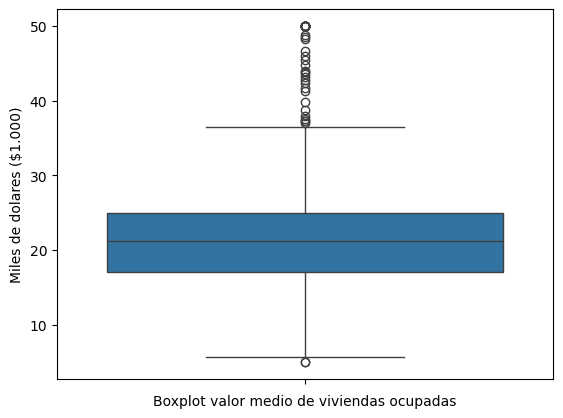

In [36]:
# Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.xlabel('Boxplot valor medio de viviendas ocupadas')
plt.ylabel('Miles de dolares ($1.000)')
plt.show()

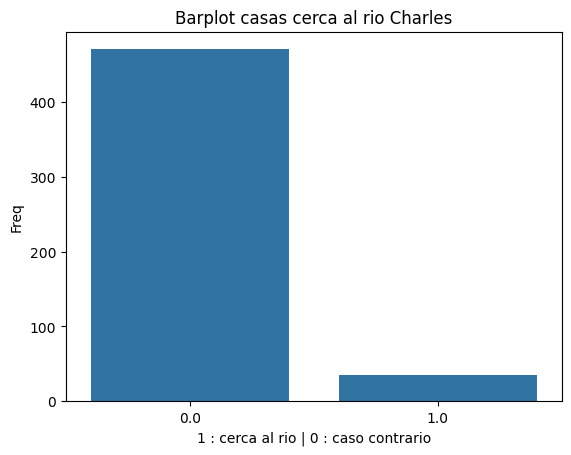

In [37]:
# Proporcione un diagrama de barras para la variable "río Charles
rcharles = boston_df['CHAS']
sns.countplot(x=rcharles)
plt.title('Barplot casas cerca al rio Charles')
plt.xlabel('1 : cerca al rio | 0 : caso contrario')
plt.ylabel('Freq')
plt.show()

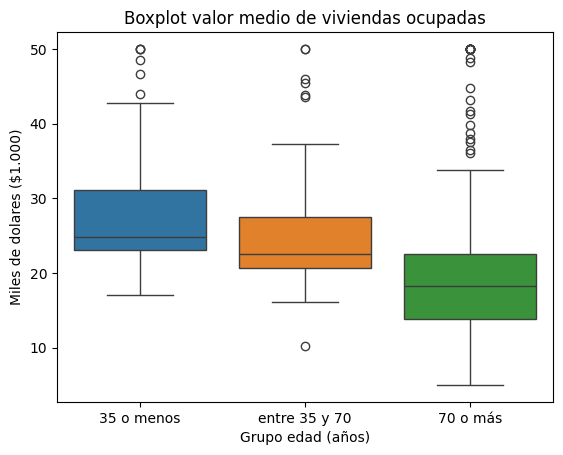

In [38]:
# Proporcione un boxplot para la variable MEDV frente a la variable EDAD. 
# (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)
#boston_df.loc[(boston_df['AGE'] < 35), 'AGE_GROUP'] = '35 o menos'
#boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP']= 'entre 35 y 70'
#boston_df.loc[(boston_df['AGE'] > 70), 'AGE_GROUP'] = '70 o más'
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 o menos', 'entre 35 y 70', '70 o más'])

sns.boxplot(x='AGE_GROUP', y='MEDV', hue='AGE_GROUP', data=boston_df)
plt.title('Boxplot valor medio de viviendas ocupadas')
plt.ylabel('Miles de dolares ($1.000)')
plt.xlabel('Grupo edad (años)')
plt.show()

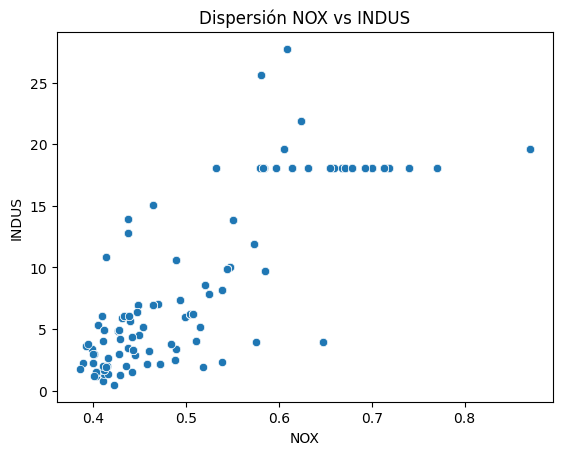

In [39]:
# Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y 
# la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Dispersión NOX vs INDUS')
plt.show()
#sns.regplot(x='NOX', y='INDUS', data=boston_df)
#plt.title('Regresion Lineal NOX vs INDUS')
#plt.show()

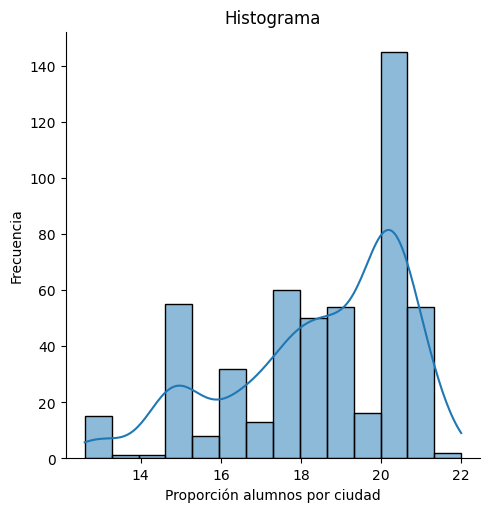

In [40]:
# Cree un histograma para la variable proporción de alumnos por profesor
sns.displot(boston_df['PTRATIO'], kde = True)
plt.title('Histograma')
plt.xlabel('Proporción alumnos por ciudad')
plt.ylabel('Frecuencia')
plt.show()

¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)<br>
$H_0 : \mu_{0}=\mu_{1}$<br>
$H_1 : \mu_{0}\neq\mu_{1}$

In [41]:
medv_0 = boston_df[boston_df['CHAS']==0]['MEDV']
medv_1 = boston_df[boston_df['CHAS']==1]['MEDV']

test = stats.ttest_ind(medv_0, medv_1)
print(f'Test : {test.statistic}\nP-valor : {test.pvalue}')
if test.pvalue > 0.05:
    print(f'Como el p-valor {test.pvalue} > 0.05 \naceptamos la hipotesis nula y decimos que no hay diferencia entre el valor medio de viviendas que colindan cerca al rio y las que no\n')
if test.pvalue < 0.05:
    print(f'Como el p-valor {test.pvalue} < 0.05 \nrechazamos la hipotesis nula y decimos que si hay diferencia entre el valor medio de viviendas que colindan cerca al rio y las que no\n')

Test : -3.996437466090509
P-valor : 7.390623170519905e-05
Como el p-valor 7.390623170519905e-05 < 0.05 
rechazamos la hipotesis nula y decimos que si hay diferencia entre el valor medio de viviendas que colindan cerca al rio y las que no



Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)<br>
$H_0 : \mu_{1}=\mu_{2}=\mu_{3}$<br>
$H_1 : \mu_{1}\neq\mu_{2}\neq\mu_{3}$

In [42]:
age_35 = boston_df[boston_df['AGE_GROUP'] == '35 o menos']['MEDV']
age_35_70 = boston_df[boston_df['AGE_GROUP'] == 'entre 35 y 70']['MEDV']
age_70 = boston_df[boston_df['AGE_GROUP'] == '70 o más']['MEDV']

t_anova = stats.f_oneway(age_35,age_35_70,age_70)
print(t_anova)
if t_anova.pvalue > 0.05:
    print(f'Como el p-valor {t_anova.pvalue} > 0.05 \naceptamos la hipotesis nula y decimos que no hay diferencia entre el valor medio de viviendas por grupos de edad\n')
if t_anova.pvalue < 0.05:
    print(f'Como el p-valor {t_anova.pvalue} < 0.05 \nrechazamos la hipotesis nula y decimos que si hay diferencia entre el valor medio de viviendas por grupos de edad\n')

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
Como el p-valor 1.7105011022702984e-15 < 0.05 
rechazamos la hipotesis nula y decimos que si hay diferencia entre el valor medio de viviendas por grupos de edad



¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico (NOX) y la proporción de acres comerciales no minoristas por ciudad (INDUS)? (Correlación de Pearson)<br>
$H_0=p_1=p_2$<br>
$H_1=p_1\neq p_2$<br>

In [43]:
t_pearson = stats.pearsonr(boston_df.NOX, boston_df.INDUS)
print(t_pearson)
if t_pearson.pvalue > 0.05:
    print(f'Como el p-valor {t_pearson.pvalue} > 0.05 \naceptamos la hipotesis nula y decimos que no existe una relación entre NOX y INDUS\n')
if t_pearson.pvalue < 0.05:
    print(f'Como el p-valor {t_pearson.pvalue} < 0.05 \nrechazamos la hipotesis nula y decimos que existe una relación lineal entre NOX y INDUS\n')

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
Como el p-valor 7.913361061210442e-98 < 0.05 
rechazamos la hipotesis nula y decimos que existe una relación lineal entre NOX y INDUS



¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston (DIS) sobre el valor medio de las viviendas ocupadas por sus propietarios (MEDV)? (Análisis de regresión)

In [44]:
X = boston_df.DIS
y = boston_df.MEDV
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

pvalue_DIS = model.pvalues.iloc[1]
if pvalue_DIS > 0.05:
    print(f'Como el p-valor {pvalue_DIS} > 0.05 \naceptamos la hipotesis nula y decimos que DIS no tiene un impacto significativo con MEDV\n')
if pvalue_DIS < 0.05:
    print(f'Como el p-valor {pvalue_DIS} < 0.05 \nrechazamos la hipotesis nula y decimos que DIS tiene un impacto significativo con MEDV\n')

Como el p-valor 1.2066117273372235e-08 < 0.05 
rechazamos la hipotesis nula y decimos que DIS tiene un impacto significativo con MEDV

